In [98]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime

In [10]:
df = pd.read_csv("calFire_cleaned.csv",skiprows = 0)
df.head()

,incident_county,incident_acres_burned,incident_cooperating_agencies,fire_started,fire_extinguished,days_of_fire
0,Shasta,37.0,Shasta-Trinity National Forest,2017-10-31,2018-01-09,70.0
1,San Diego,122.0,CAL FIRE San Diego Unit,2009-05-24,2009-05-25,1.0
2,Inyo,406.0,"CAL FIRE San Bernardino Unit, Inyo County Sher...",2013-02-24,2013-02-28,4.0
3,San Bernardino,30.0,San Bernardino National Forest,2013-04-20,2013-04-22,2.0
4,Madera,274.0,CAL FIRE Madera-Mariposa-Merced Unit,2013-04-30,2013-05-01,1.0


In [11]:
df['fire_started'] = pd.to_datetime(df['fire_started'], format='%Y-%m-%d')

In [12]:
df['fire_extinguished'] = pd.to_datetime(df['fire_extinguished'], format='%Y-%m-%d')

In [85]:
df

,incident_county,incident_acres_burned,incident_cooperating_agencies,fire_started,fire_extinguished,days_of_fire
0,Shasta,37.0,Shasta-Trinity National Forest,2017-10-31,2018-01-09,70.0
1,San Diego,122.0,CAL FIRE San Diego Unit,2009-05-24,2009-05-25,1.0
2,Inyo,406.0,"CAL FIRE San Bernardino Unit, Inyo County Sher...",2013-02-24,2013-02-28,4.0
3,San Bernardino,30.0,San Bernardino National Forest,2013-04-20,2013-04-22,2.0
4,Madera,274.0,CAL FIRE Madera-Mariposa-Merced Unit,2013-04-30,2013-05-01,1.0
5,Madera,274.0,CAL FIRE Madera-Mariposa-Merced Unit,2013-04-30,2013-05-01,1.0
6,Madera,274.0,CAL FIRE Madera-Mariposa-Merced Unit,2013-04-30,2013-05-01,1.0
7,Tehama,6965.0,"CAL FIRE Butte Unit, CAL FIRE, USFS (Lassen an...",2013-05-01,2013-05-09,8.0
8,Napa,75.0,CAL FIRE Sonoma-Lake-Napa Unit,2013-04-30,2013-05-01,1.0
9,Sonoma,125.0,CAL FIRE Sonoma-Lake-Napa Unit,2013-05-01,2013-05-03,2.0


In [86]:
new_df = df[['incident_county','incident_acres_burned']].groupby('incident_county').sum().sort_values(by = 'incident_acres_burned', 
ascending = True)

In [90]:
new_df = new_df[ new_df['incident_county'].str.contains(',')==False ]

In [145]:
#df['month'] = pd.DatetimeIndex(df['fire_started']).month
month_relevancy = df[['incident_acres_burned','month']]

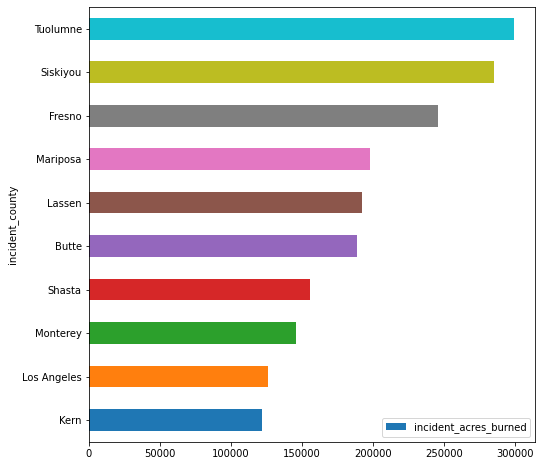

In [136]:
new_df 

new_df[-10:].plot(x='incident_county', y='incident_acres_burned', kind="barh", figsize=(8,8))

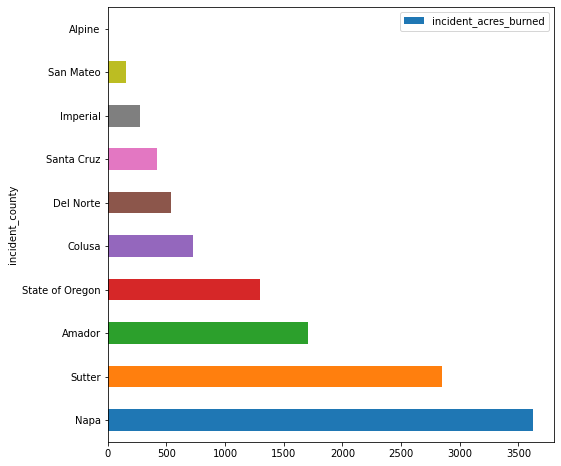

In [141]:
new_df.sort_values('incident_acres_burned', ascending=False)[-10:].plot(x='incident_county', y='incident_acres_burned', kind="barh", figsize=(8,8))



(0.0, 300000.0)

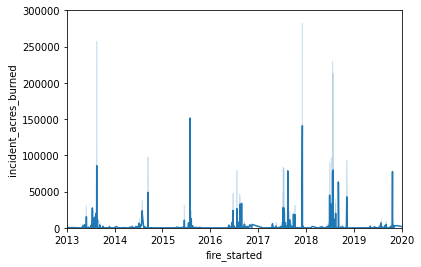

In [138]:
fig, ax = plt.subplots()
sns.lineplot(data=df, x="fire_started", y="incident_acres_burned", ax = ax)
ax.set_xlim([datetime.date(2013,1,1), datetime.date(2020,1,1)])
ax.set_ylim(0, 300000)

In [155]:
MRF = month_relevancy.groupby('month').sum()

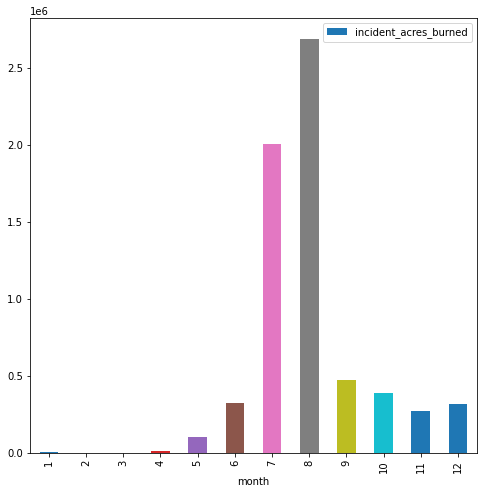

In [161]:
MRF.plot(y='incident_acres_burned', kind="bar", figsize=(8,8))